In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib

In [3]:
matplotlib.__version__

'2.2.2'

In [9]:
img = cv2.imread('3.png',0)

In [11]:
img.shape

(245, 216)

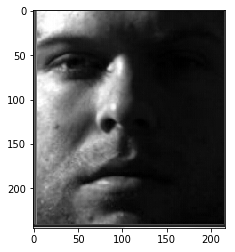

In [12]:
ori_img = img
plt.subplot(111)
plt.imshow(ori_img,cmap='gray')

In [13]:
#gamma rectify
img = np.power(img, 0.5)
img = cv2.normalize(img,img, 0,255,cv2.NORM_MINMAX, cv2.CV_32F)

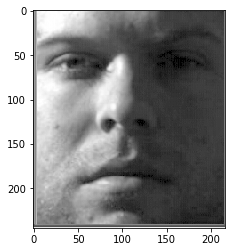

In [14]:
# to change flaot to uint8 to better imshow
gamma_img = cv2.normalize(img,img,0,255, cv2.NORM_MINMAX, cv2.CV_8UC1)
plt.imshow(gamma_img,cmap='gray')

In [52]:
gradient = np.zeros(img.shape, dtype=np.float64)
theta = np.zeros(img.shape, dtype=np.float64)

In [53]:
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        Gx = img[i][j+1] - img[i][j-1]
        Gy = img[i+1][j] - img[i-1][j]
        gradient[i][j] = np.sqrt(Gx**2+Gy**2)
        if Gx == 0:
            theta[i][j] = 90.0
            continue
        theta[i][j] = np.arctan(Gy/Gx)*180/np.pi

In [54]:
gradient = cv2.normalize(gradient, gradient, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

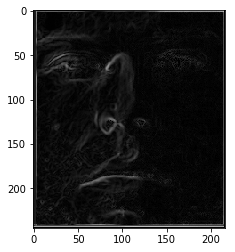

In [55]:
plt.imshow(gradient,cmap='gray')

      original img               gamma rectification               gradient features


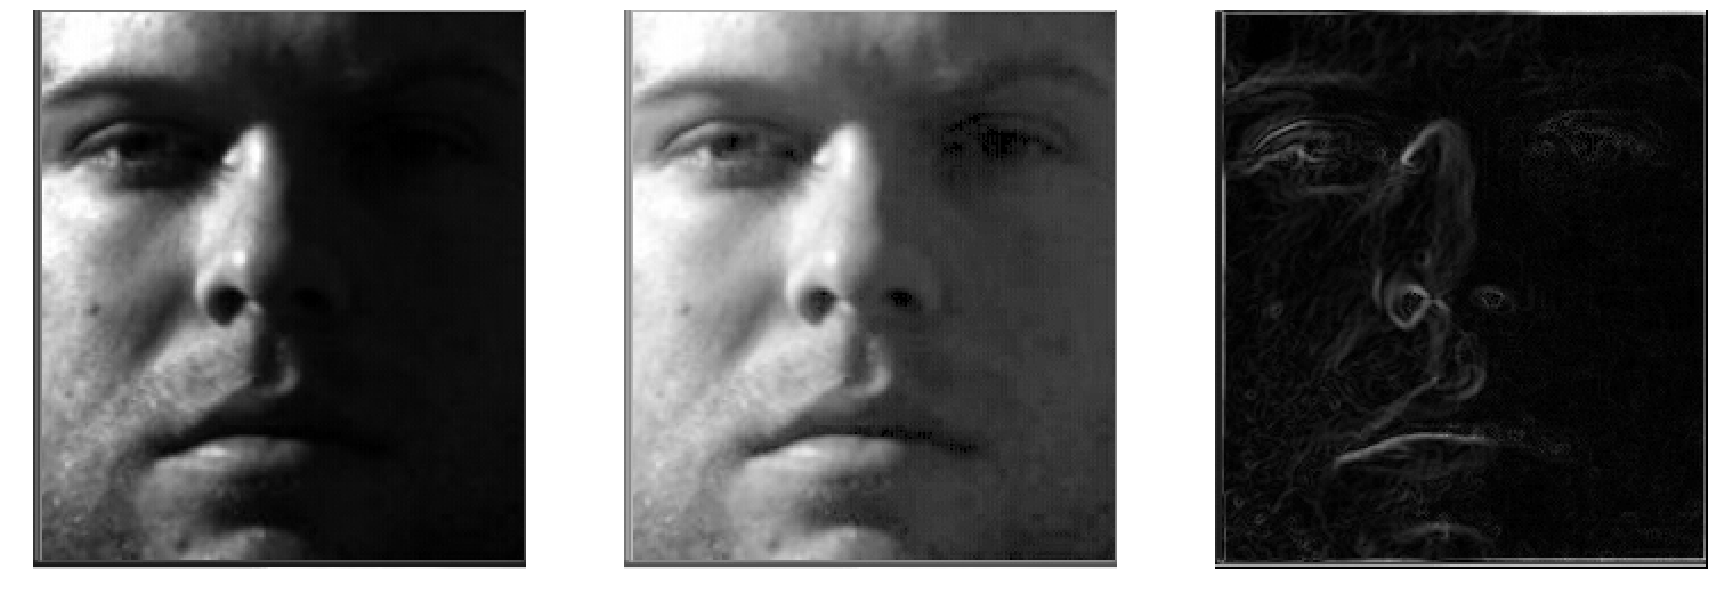

In [75]:
plt.figure(figsize=(30,40))

plt.subplot(131);plt.axis('off');plt.imshow(ori_img,cmap='gray')
plt.subplot(132);plt.axis('off');plt.imshow(gamma_img, cmap='gray')
plt.subplot(133);plt.axis('off');plt.imshow(gradient, cmap='gray')
print('      original img               gamma rectification               gradient features')